In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
!git clone https://github.com/yohanesnuwara/volve-machine-learning


fatal: destination path 'volve-machine-learning' already exists and is not an empty directory.


In [9]:
!pip install lasio
import lasio

In [10]:
pip install welly

In [11]:
pip install welly

In [12]:
import glob
import os

In [13]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/volve-machine-learning/well_logs", "*.LAS")))

well_df = [0] * 5

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well1, well2, well3, well4, well5 = well_df


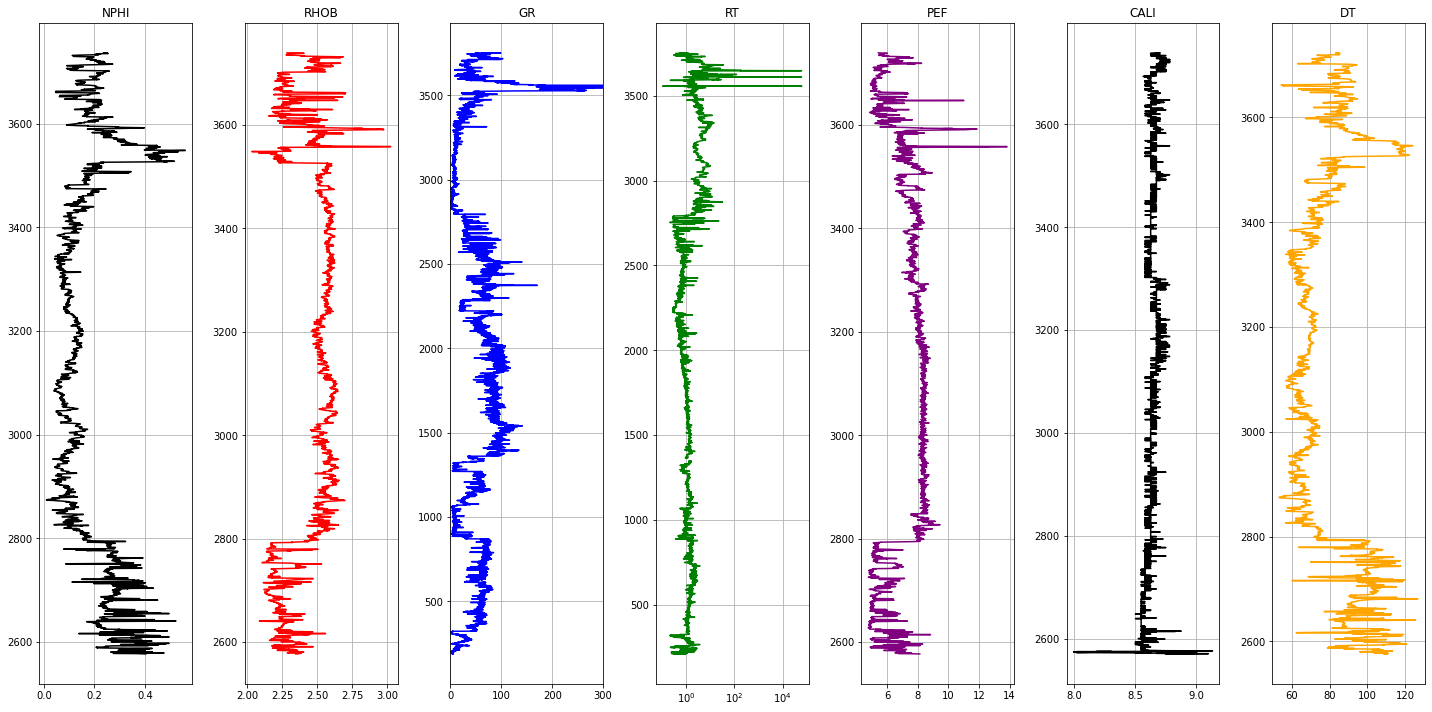

In [14]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

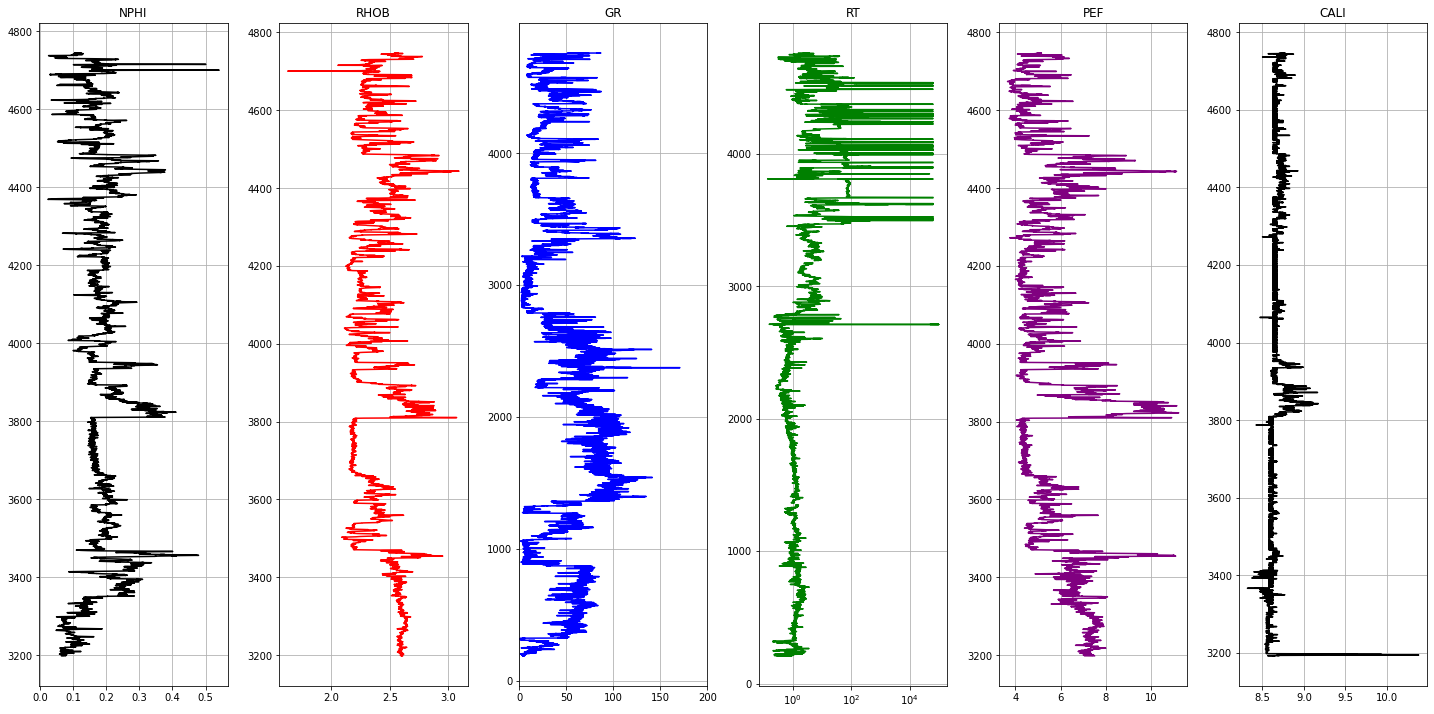

In [15]:
# Display the test data
well = well2 # test wells: well2, well5

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 200)
plt.tight_layout(1)
plt.show()

In [16]:
# lower limit
low = [2600, 3200, 2620, 3100, 3100]

# upper limit
up = [3720, 4740, 3640, 3400, 4050]

# train columns to use
train_cols = ['DEPTH', 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# test columns to use
test_cols = ['DEPTH', 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

well_df_restrict = [0] * 5

for i in range(len(well_df)):
  # restrict depth within the given lower and upper limit
  df = well_df[i].loc[(well_df[i]['DEPTH'] >= low[i]) & (well_df[i]['DEPTH'] <= up[i])]

  if i == 0 or i == 2 or i == 3:
    # the train data, drop unwanted columns
    well_df_restrict[i] = df[train_cols]
  
  else:
    # the test data, drop unwanted columns
    well_df_restrict[i] = df[test_cols]

well1, well2, well3, well4, well5 = well_df_restrict

# as we can see, both ends already not have NaNs
well5

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
29541,3100.0,0.1378,2.5729,33.1264,3.0503,7.9837,8.5243
29542,3100.1,0.1368,2.5696,32.5644,3.0585,7.9401,8.5243
29543,3100.2,0.1351,2.5670,32.3169,3.0454,7.9126,8.5243
29544,3100.3,0.1341,2.5668,32.9734,3.0365,7.9216,8.5243
29545,3100.4,0.1349,2.5690,33.0557,3.0844,7.9582,8.5243
...,...,...,...,...,...,...,...
39037,4049.6,0.3107,2.4184,106.7613,2.6950,6.2332,8.5569
39038,4049.7,0.2997,2.4186,109.0336,2.6197,6.2539,8.5569
39039,4049.8,0.2930,2.4232,106.0935,2.5948,6.2883,8.5570
39040,4049.9,0.2892,2.4285,105.4931,2.6344,6.3400,8.6056


In [17]:
# merge dataframes
well_train = pd.concat([well1, well3, well4])
well_pred = pd.concat([well2, well5])

# assign names
names = ['15_9-F-11A', '15_9-F-11B', '15_9-F-1A', '15_9-F-1B', '15_9-F-1C']

names_train = []
names_pred = []
for i in range(len(well_df_restrict)):
  if i == 0 or i == 2 or i == 3:
    # train data, assign names 
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_train.append(_)
  else:
    # test data, assign names
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_pred.append(_)

# concatenate inside list
import itertools

names_train = list(itertools.chain.from_iterable(names_train))
names_pred = list(itertools.chain.from_iterable(names_pred))

# include well names to the train and pred dataframe
well_train['WELL'] = names_train
well_pred['WELL'] = names_pred

# move the depth column to the right
depth_train, depth_pred = well_train.pop('DEPTH'), well_pred.pop('DEPTH')
well_train['DEPTH'], well_pred['DEPTH'] = depth_train, depth_pred

well_pred

,NPHI,RHOB,GR,RT,PEF,CALI,WELL,DEPTH
30115,0.0750,2.6050,9.3480,8.3310,7.4510,8.5470,15_9-F-11B,3200.0
30116,0.0770,2.6020,9.3620,8.2890,7.4640,8.5470,15_9-F-11B,3200.1
30117,0.0780,2.5990,9.5450,8.2470,7.4050,8.5470,15_9-F-11B,3200.2
30118,0.0790,2.5940,11.1530,8.2060,7.2920,8.5470,15_9-F-11B,3200.3
30119,0.0780,2.5890,12.5920,8.1650,7.1670,8.5470,15_9-F-11B,3200.4
...,...,...,...,...,...,...,...,...
39037,0.3107,2.4184,106.7613,2.6950,6.2332,8.5569,15_9-F-1C,4049.6
39038,0.2997,2.4186,109.0336,2.6197,6.2539,8.5569,15_9-F-1C,4049.7
39039,0.2930,2.4232,106.0935,2.5948,6.2883,8.5570,15_9-F-1C,4049.8
39040,0.2892,2.4285,105.4931,2.6344,6.3400,8.6056,15_9-F-1C,4049.9


In [18]:
well_train

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
24115,0.3710,2.3560,82.7480,1.3230,7.1260,8.6480,104.6050,15_9-F-11A,2600.0
24116,0.3410,2.3380,79.3990,1.1960,6.6540,8.5780,103.8270,15_9-F-11A,2600.1
24117,0.3080,2.3150,74.2480,1.1710,6.1050,8.5780,102.7400,15_9-F-11A,2600.2
24118,0.2830,2.2910,68.5420,1.1420,5.6130,8.5470,100.9430,15_9-F-11A,2600.3
24119,0.2720,2.2690,60.3140,1.1070,5.2810,8.5230,98.4730,15_9-F-11A,2600.4
...,...,...,...,...,...,...,...,...,...
32537,0.1861,2.4571,60.4392,1.2337,5.9894,8.7227,75.3947,15_9-F-1B,3399.6
32538,0.1840,2.4596,61.8452,1.2452,6.0960,8.6976,75.3404,15_9-F-1B,3399.7
32539,0.1798,2.4637,61.1386,1.2960,6.1628,8.6976,75.3298,15_9-F-1B,3399.8
32540,0.1780,2.4714,59.3751,1.4060,6.1520,8.6976,75.3541,15_9-F-1B,3399.9


In [23]:
well4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 29541 to 32541
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   3001 non-null   float64
 1   NPHI    3001 non-null   float64
 2   RHOB    3001 non-null   float64
 3   GR      3001 non-null   float64
 4   RT      3001 non-null   float64
 5   PEF     3001 non-null   float64
 6   CALI    3001 non-null   float64
 7   DT      3001 non-null   float64
dtypes: float64(8)
memory usage: 211.0 KB


In [24]:
colnames = well_train.columns
only_feature = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI'] # only feature column names
only_target = 'DT' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'WELL', 'DEPTH'], dtype='object')

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# transform the RT to logarithmic
well_train['RT'] = np.log10(well_train['RT'])

# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

## ColumnTransformer
column_drop = ['WELL', 'DEPTH']
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

## fit and transform
well_train_norm = ct.fit_transform(well_train)

## convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
0,1.70217,-0.920748,1.13065,-0.631876,0.0310832,0.450019,1.58838,15_9-F-11A,2600
1,1.5734,-1.02062,1.09243,-0.736154,-0.373325,-1.07085,1.56235,15_9-F-11A,2600.1
2,1.40711,-1.14249,1.03031,-0.75808,-0.81989,-1.07085,1.52506,15_9-F-11A,2600.2
3,1.26069,-1.26308,0.956135,-0.784153,-1.19799,-1.75364,1.46093,15_9-F-11A,2600.3
4,1.18987,-1.36797,0.837247,-0.816586,-1.44115,-2.28622,1.36743,15_9-F-11A,2600.4
...,...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.04171,0.0479411,15_9-F-1B,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.51043,0.043466,15_9-F-1B,3399.7
24400,0.393869,-0.232335,0.849885,-0.65312,-0.774093,1.51043,0.0425913,15_9-F-1B,3399.8
24401,0.373838,-0.176628,0.82264,-0.569367,-0.782672,1.51043,0.0445959,15_9-F-1B,3399.9


In [26]:
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['WELL'].astype(str)
z = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y, z], axis=1)

In [27]:
well_train_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
0,1.702168,-0.920748,1.130650,-0.631876,0.031083,0.450019,1.588380,15_9-F-11A,2600.0
1,1.573404,-1.020621,1.092435,-0.736154,-0.373325,-1.070848,1.562349,15_9-F-11A,2600.1
2,1.407108,-1.142493,1.030314,-0.758080,-0.819890,-1.070848,1.525055,15_9-F-11A,2600.2
3,1.260691,-1.263078,0.956135,-0.784153,-1.197992,-1.753641,1.460934,15_9-F-11A,2600.3
4,1.189869,-1.367969,0.837247,-0.816586,-1.441155,-2.286221,1.367432,15_9-F-11A,2600.4
...,...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941,15_9-F-1B,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466,15_9-F-1B,3399.7
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591,15_9-F-1B,3399.8
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596,15_9-F-1B,3399.9


In [28]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['WELL', 'DEPTH'], axis=1)

In [29]:
well_train_drop

,NPHI,RHOB,GR,RT,PEF,CALI,DT
0,1.702168,-0.920748,1.130650,-0.631876,0.031083,0.450019,1.588380
1,1.573404,-1.020621,1.092435,-0.736154,-0.373325,-1.070848,1.562349
2,1.407108,-1.142493,1.030314,-0.758080,-0.819890,-1.070848,1.525055
3,1.260691,-1.263078,0.956135,-0.784153,-1.197992,-1.753641,1.460934
4,1.189869,-1.367969,0.837247,-0.816586,-1.441155,-2.286221,1.367432
...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596


In [30]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 24403
Number of points after outliers removed with Standard Deviation: 24101
Number of points after outliers removed with Isolation Forest  : 12202
Number of points after outliers removed with Min. Covariance   : 21962
Number of points after outliers removed with Outlier Factor    : 17082
Number of points after outliers removed with One-class SVM     : 21964


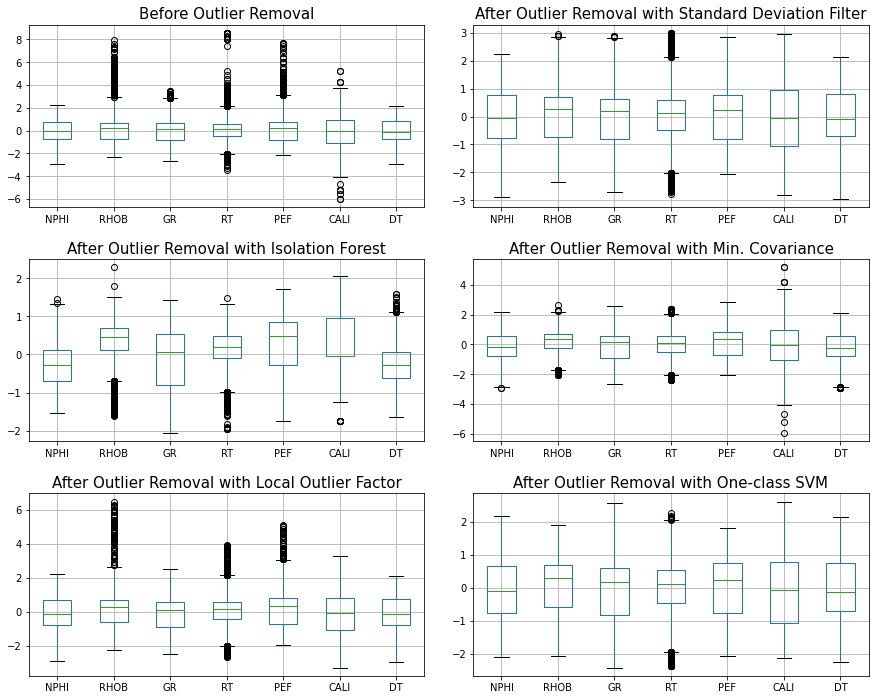

In [31]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

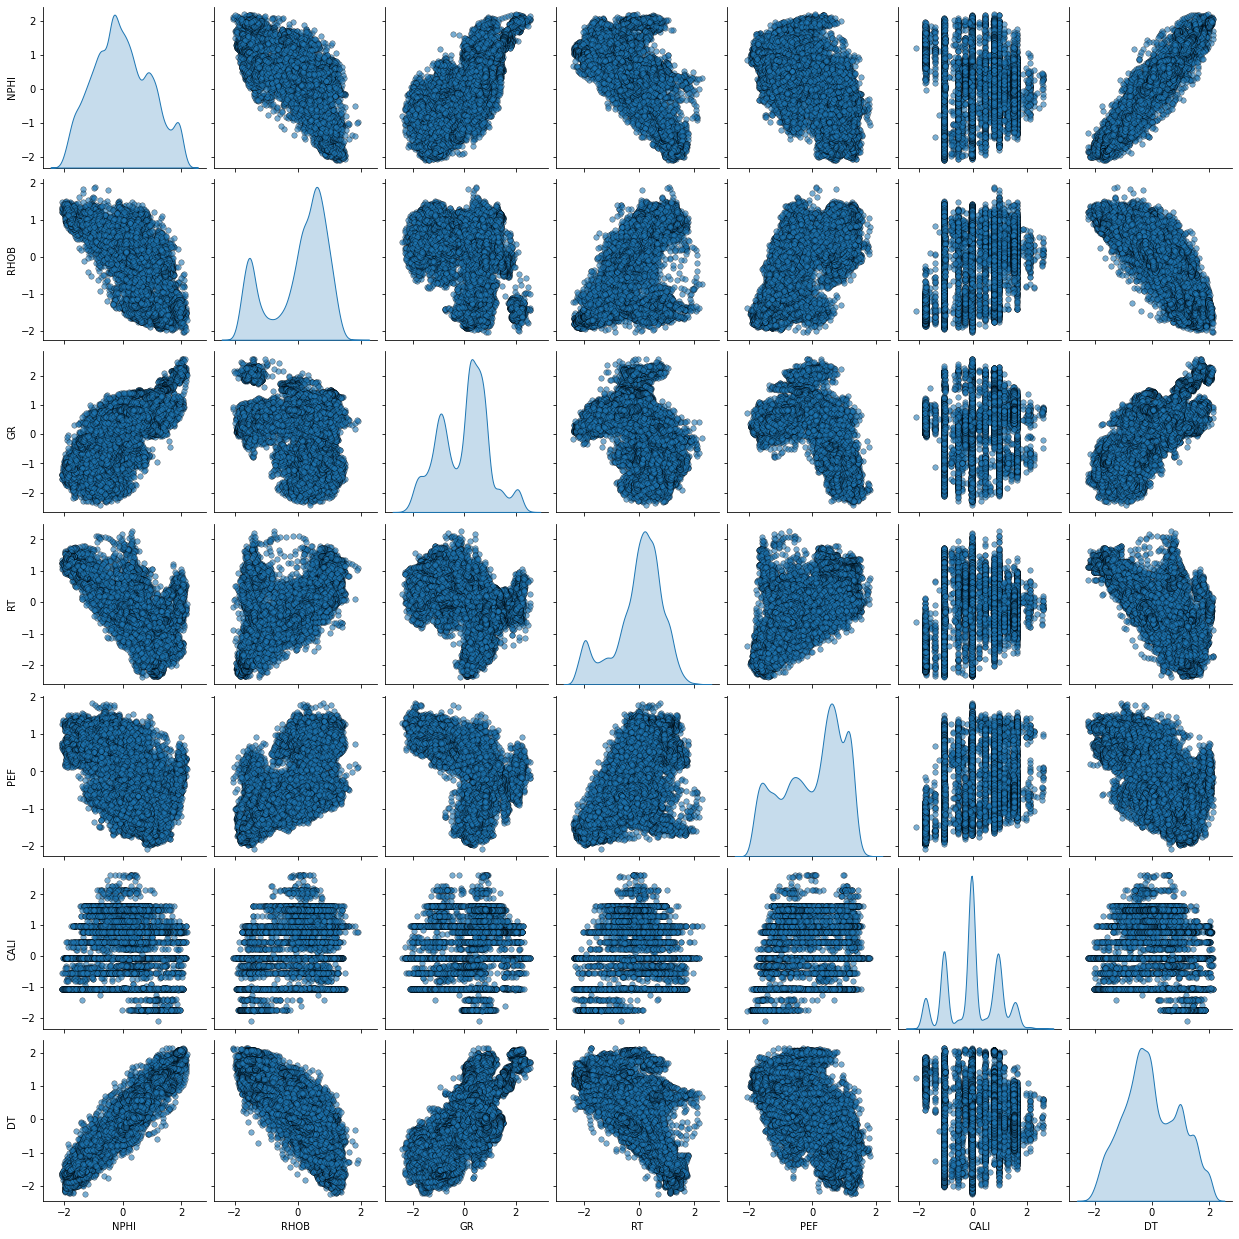

In [32]:
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [33]:
# Define the train data
feature = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
target = 'DT'

X_train = well_train_svm[only_feature].values
y_train = well_train_svm[only_target].values

In [94]:
array = ['Bikram','Deepak']
array.append('Billa')
for i in range len(array):
  array[i]

SyntaxError: ignored

In [98]:
for i in range(len(array)):
  print(array[i])

Bikram
Deepak
Billa


In [96]:
test = test.drop(['WELL'], axis=1)

['Bikram', 'Deepak', 'Billa']

In [101]:
a= array.copy[]
a

SyntaxError: ignored

In [102]:
test


,NPHI,RHOB,GR,RT,PEF,CALI,DT,DEPTH
21402,-1.422361,1.198528,-0.210824,0.646892,1.042314,0.787204,-0.705746,3100.0
21403,-1.391461,1.193432,-0.229337,0.640483,1.044442,0.787204,-0.672530,3100.1
21404,-1.365194,1.194450,-0.247941,0.619921,0.995885,0.787204,-0.635090,3100.2
21405,-1.345625,1.197508,-0.233267,0.594589,0.917361,0.787204,-0.600323,3100.3
21406,-1.330483,1.199547,-0.229749,0.597755,0.844228,0.787204,-0.574927,3100.4
...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466,3399.7
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591,3399.8
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596,3399.9


In [103]:
X_train

array([[ 1.70216805, -0.92074812,  1.13064995, -0.63187607,  0.03108323,
         0.45001899],
       [ 1.57340361, -1.02062067,  1.09243495, -0.73615442, -0.3733254 ,
        -1.07084842],
       [ 1.40710799, -1.14249265,  1.03031402, -0.75808007, -0.81989013,
        -1.07084842],
       ...,
       [ 0.39386914, -0.23233546,  0.84988502, -0.65311977, -0.77409269,
         1.5104344 ],
       [ 0.37383771, -0.17662814,  0.82264   , -0.56936731, -0.78267189,
         1.5104344 ],
       [ 0.35133452, -0.10660899,  0.80680747, -0.53576854, -0.81902124,
         1.51468177]])

In [105]:
print(np.size(y_train)) 

21964


In [ ]:
names_train = ['15_9-F-11A', '15_9-F-1A', '15_9-F-1B']

In [ ]:
for i in range(len(names_train))

In [115]:
well_pred1

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
0,1.702168,-0.920748,1.130650,-0.631876,0.031083,0.450019,1.588380,15_9-F-11A,2600.0
1,1.573404,-1.020621,1.092435,-0.736154,-0.373325,-1.070848,1.562349,15_9-F-11A,2600.1
2,1.407108,-1.142493,1.030314,-0.758080,-0.819890,-1.070848,1.525055,15_9-F-11A,2600.2
3,1.260691,-1.263078,0.956135,-0.784153,-1.197992,-1.753641,1.460934,15_9-F-11A,2600.3
4,1.189869,-1.367969,0.837247,-0.816586,-1.441155,-2.286221,1.367432,15_9-F-11A,2600.4
...,...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941,15_9-F-1B,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466,15_9-F-1B,3399.7
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591,15_9-F-1B,3399.8
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596,15_9-F-1B,3399.9


In [117]:
y_test1.len

AttributeError: ignored

In [121]:
y_test.len()

AttributeError: ignored

In [122]:
 test

,NPHI,RHOB,GR,RT,PEF,CALI,DT,DEPTH
21402,-1.422361,1.198528,-0.210824,0.646892,1.042314,0.787204,-0.705746,3100.0
21403,-1.391461,1.193432,-0.229337,0.640483,1.044442,0.787204,-0.672530,3100.1
21404,-1.365194,1.194450,-0.247941,0.619921,0.995885,0.787204,-0.635090,3100.2
21405,-1.345625,1.197508,-0.233267,0.594589,0.917361,0.787204,-0.600323,3100.3
21406,-1.330483,1.199547,-0.229749,0.597755,0.844228,0.787204,-0.574927,3100.4
...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466,3399.7
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591,3399.8
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596,3399.9
